In [1]:
# Set dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Import necessary keys/info
from config import pghost
from config import pgport
from config import pguser
from config import pgpwd

In [2]:
# Connect with postgres server
engine = create_engine(f'postgresql://{pguser}:{pgpwd}@{pghost}:{pgport}/postgres')
connection = engine.connect()

In [3]:
# Load data into dataframe
salary = pd.read_sql(
    "SELECT * \
    FROM employees AS e \
    INNER JOIN salaries AS s \
    ON e.emp_no = s.emp_no \
    INNER JOIN titles as t \
    ON e.emp_title_id = t.title_id", connection)

In [4]:
# View dataframe
salary.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,emp_no,salary,title_id,title
0,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,57444,48973,e0002,Engineer
1,13616,e0003,1961-08-30,Perry,Lorho,F,1991-08-03,13616,40000,e0003,Senior Engineer
2,240129,e0004,1952-08-11,Roddy,Karnin,M,1985-05-29,240129,43548,e0004,Technique Leader
3,427958,s0001,1957-05-03,Feixiong,Poujol,F,1985-05-11,427958,63377,s0001,Staff
4,35916,e0003,1953-08-15,Wonhee,Talmon,F,1985-03-20,35916,40000,e0003,Senior Engineer


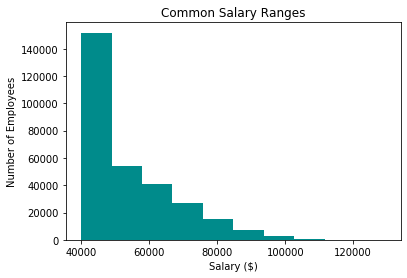

In [5]:
# Create a histogram to view the distribution of salary across ten bins
x = salary['salary']
bins = 10

n, bins, patches = plt.hist(x, bins, facecolor='darkcyan')
plt.title("Common Salary Ranges")
plt.xlabel("Salary ($)")
plt.ylabel("Number of Employees")
plt.savefig("images/salary_ranges.png")
plt.show()

In [6]:
# Query average salary data for each title 
avg_salary = salary.groupby('title')['salary'].mean()
avg_salary

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

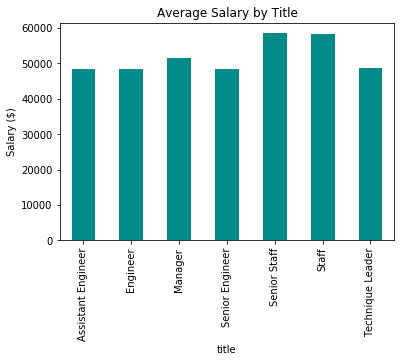

In [9]:
# Create bar chart showing average salary by title
avg_salary.plot.bar(color='darkcyan')
plt.title('Average Salary by Title')
plt.ylabel('Salary ($)')
plt.savefig("images/average_salary.png")

In [8]:
# Search and view records on ID number 499942
salary.query('emp_no==499942')

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,emp_no,salary,title_id,title
42305,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10,499942,40000,e0004,Technique Leader
